# <b> Performing the visualization of the Dataset </b>

Data visualization refers to the graphical representation of data and information. The goal of data visualization is to present complex data in a way that is visually appealing, easy to understand, and informative. Data visualization is an important tool for data analysis and communication, as it can help to reveal patterns, trends, and relationships that might not be immediately apparent from raw data.

In [5]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Retrieving the data

data = pd.read_csv('Dataset/Data_Cleaned.csv')

In [7]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'Weekly_Sales'}>,
        <AxesSubplot: title={'center': 'Holiday_Flag'}>],
       [<AxesSubplot: title={'center': 'Temperature'}>,
        <AxesSubplot: title={'center': 'Fuel_Price'}>,
        <AxesSubplot: title={'center': 'CPI'}>],
       [<AxesSubplot: title={'center': 'Unemployment'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

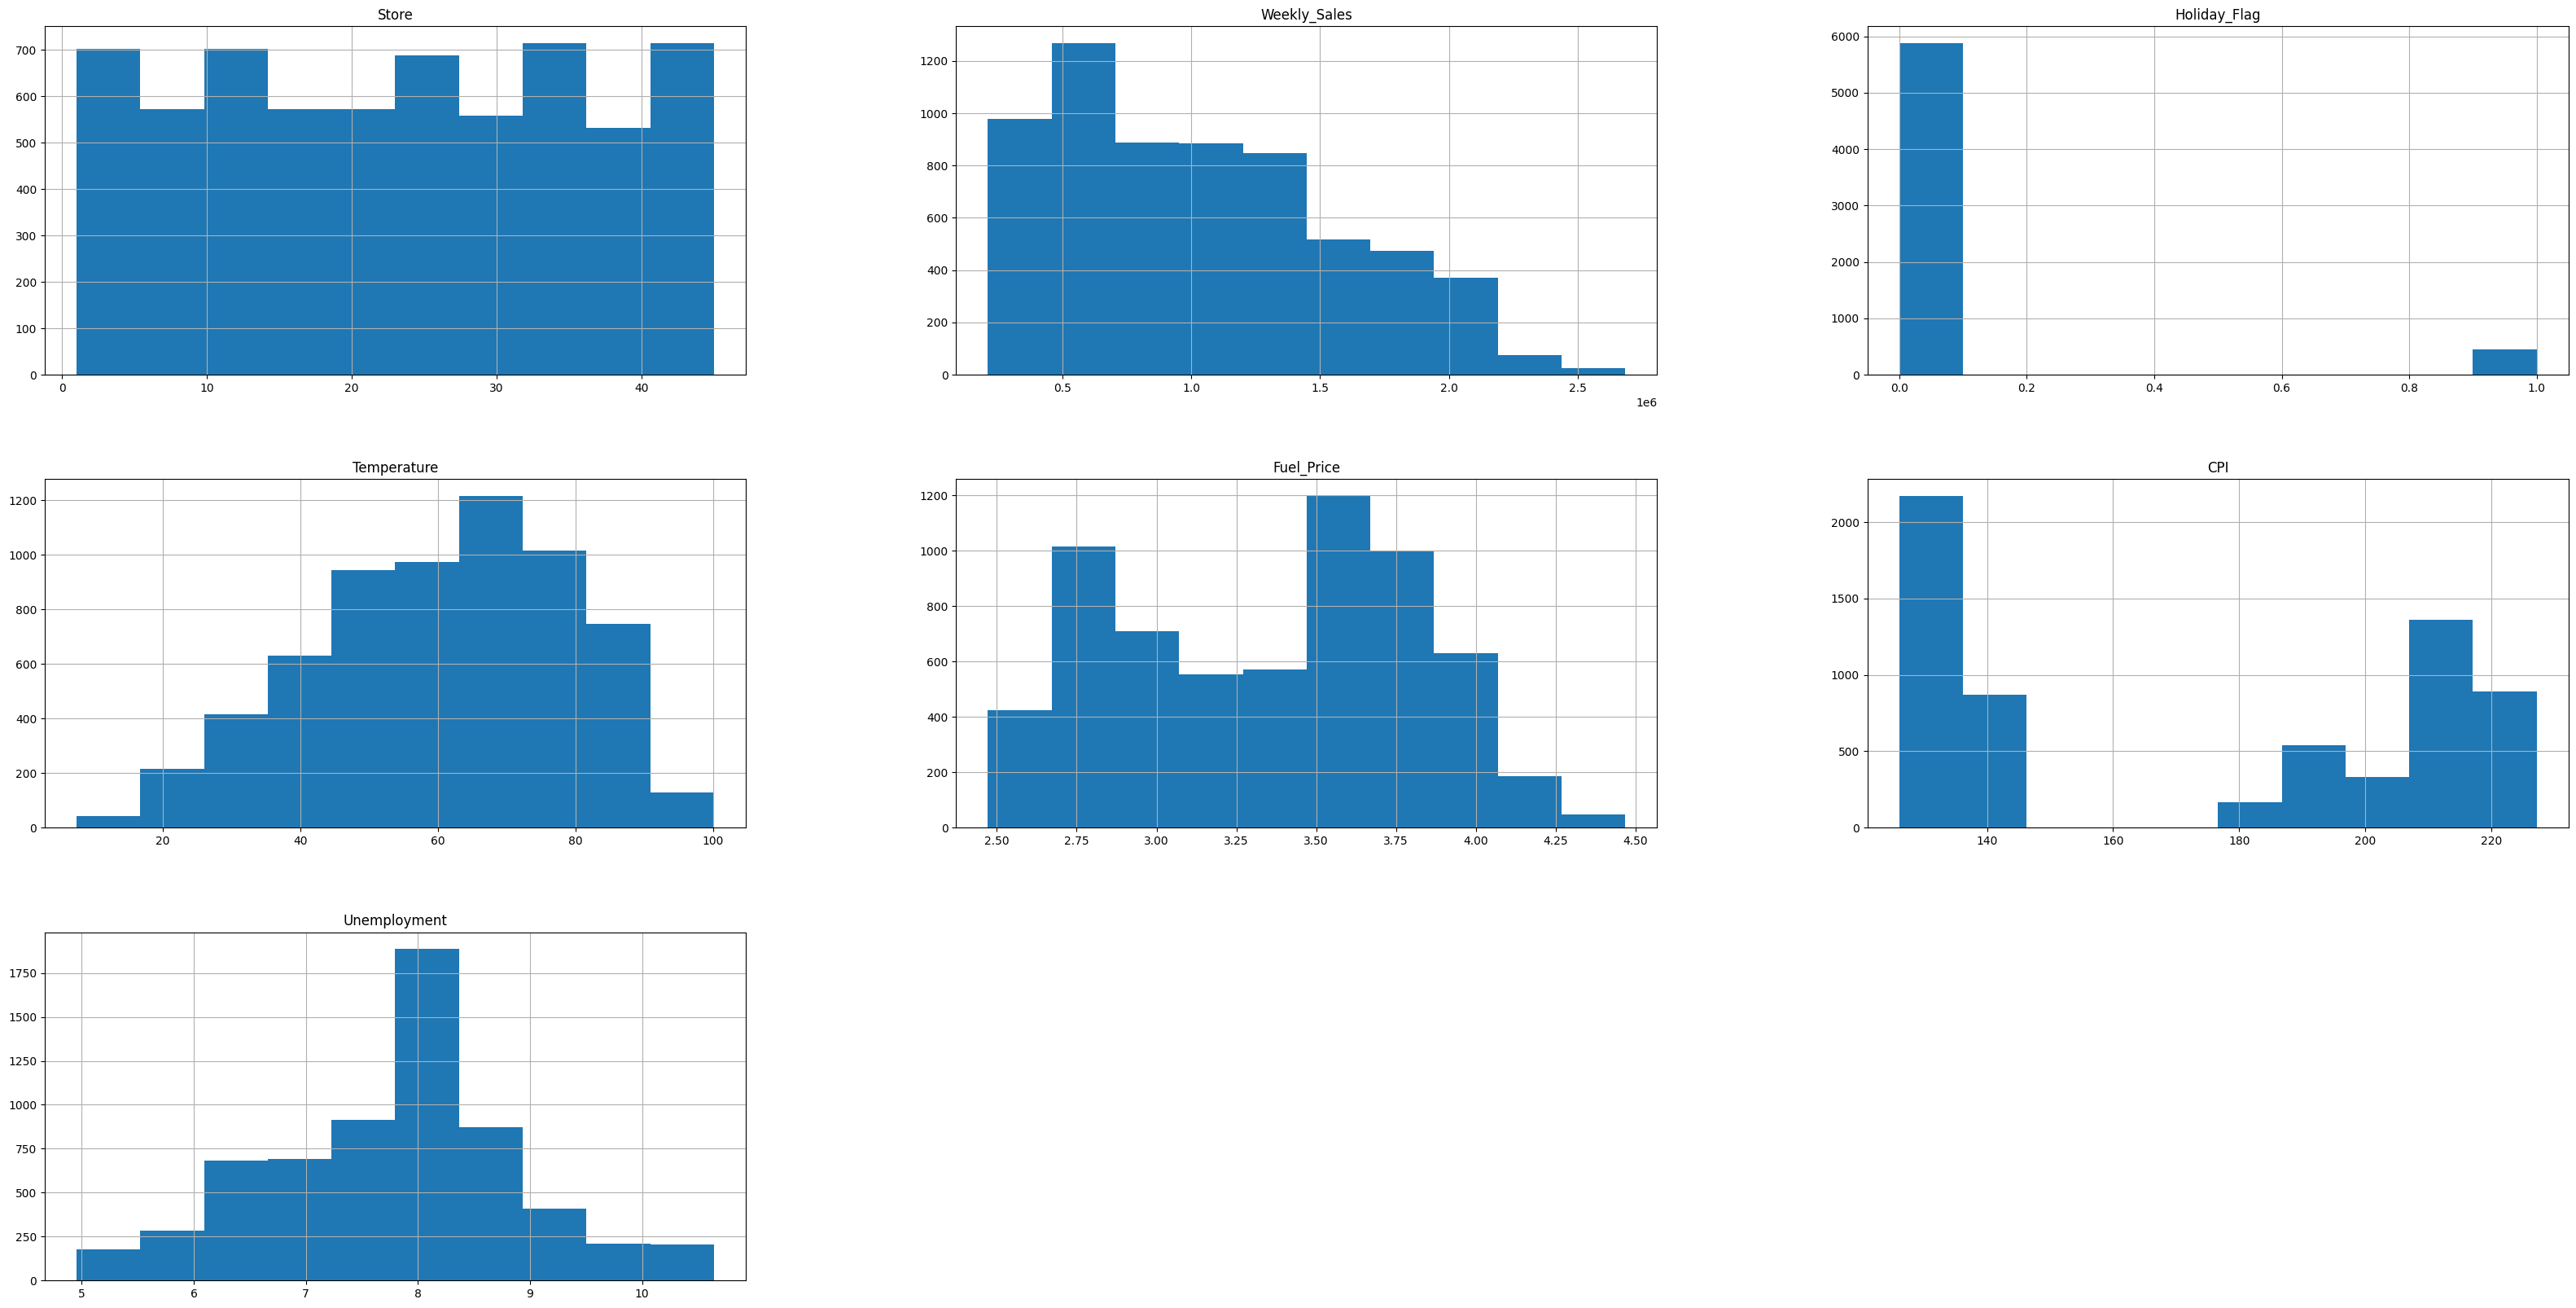

In [8]:
data.hist(figsize=(40,20))

<b> Inference : </b>
- the number of transactions occurred almost evenly across various stores and years.
- The distribution of weekly_sales right-skewed. 
- The distribution of temperature is approximately normal,a little bit left-skewed.
- The distribution of fuel_price is bi-modal.
- CPI formed two clusters.
= unemployment rate is near normally distributed.

# Visualizing the sales over time


In [9]:
# We have a column with the date information
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].head()

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]

In [10]:
# Using it to create a column month for plotting the monthly,yearly data sales

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [11]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [12]:
data['year'].value_counts()

2011    2286
2010    2160
2012    1883
Name: year, dtype: int64

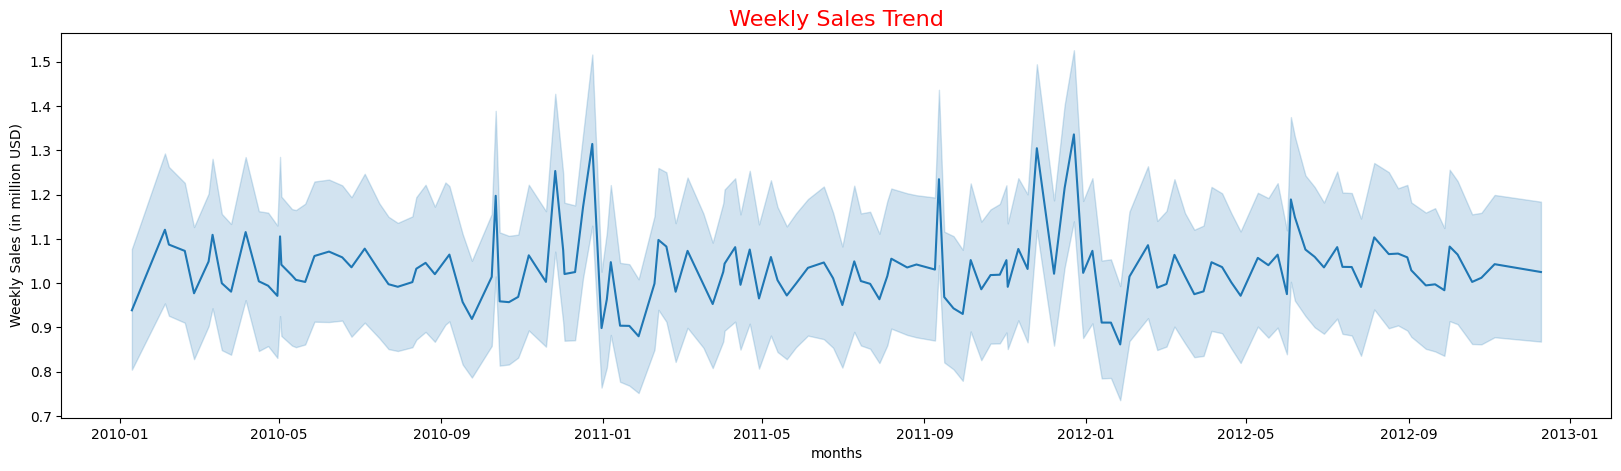

In [13]:
# Sales over months

fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=data.Date, y=(data.Weekly_Sales/1e6))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',fontdict={'fontsize': 16, 'color':'red'}, pad=5)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.show()

<b> Inference : </b> Sales grows in the month of :

- November
- December

# Visualizing the holiday effects over sales

In [14]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [15]:
holiday = data[data['Holiday_Flag']==1]
non_holiday = data[data['Holiday_Flag']!=1]

{'whiskers': [<matplotlib.lines.Line2D at 0x14783ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x14783be90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1478a69d0>],
 'medians': [<matplotlib.lines.Line2D at 0x147849090>],
 'fliers': [<matplotlib.lines.Line2D at 0x14783b650>],
 'means': []}

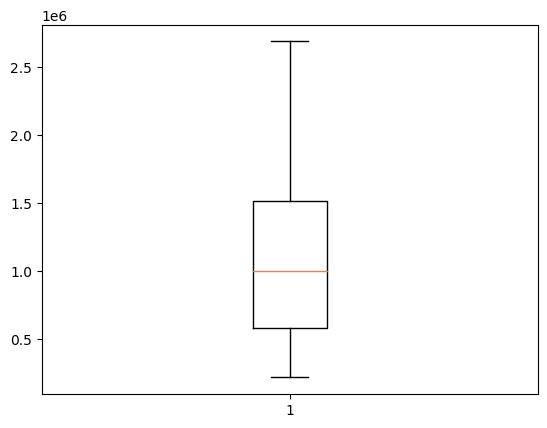

In [16]:
plt.boxplot(holiday['Weekly_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1478b1410>,
 'caps': [<matplotlib.lines.Line2D at 0x1478b2710>,
 'boxes': [<matplotlib.lines.Line2D at 0x14787e2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1478b3910>],
 'fliers': [<matplotlib.lines.Line2D at 0x147813850>],
 'means': []}

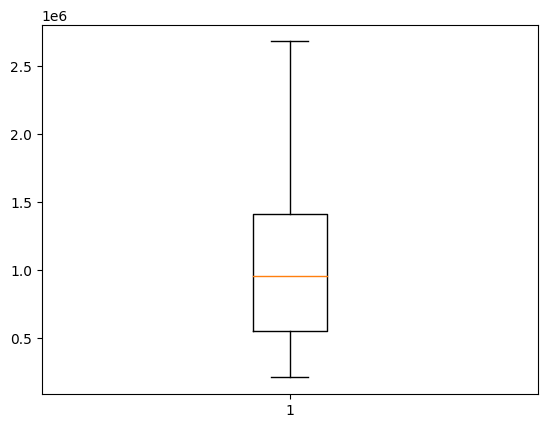

In [17]:
plt.boxplot(non_holiday['Weekly_Sales'])

# Creating the heatmap to check for the data correlations

/var/folders/4r/21z41gt55tdf56zf__j7s8b80000gn/T/ipykernel_12561/3245536585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")


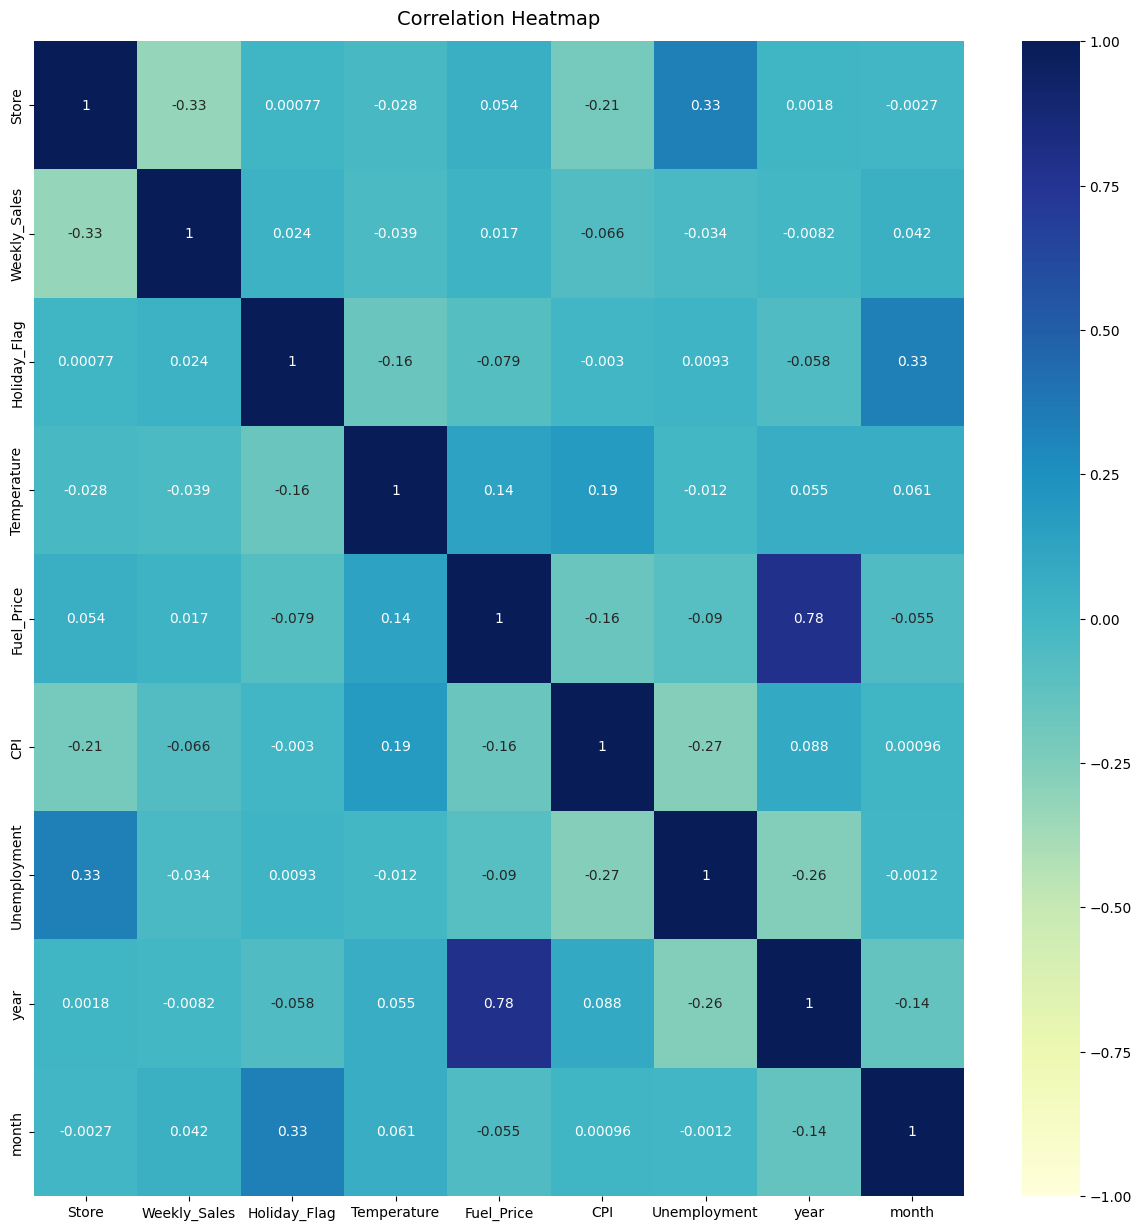

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);